In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xarray as xr

Getting all cnr values for the entire day

In [2]:
path_day = "/Users/jenifervivar/Desktop/Desktop - jenifer’s MacBook Air/Fall 2021 NOAA Project/Lidar_Data/Vertical_data/FXD20210826/"
cnr_day = np.array([])
time_day = np.array([])
for file in sorted(os.listdir(path_day)):
    #skips dummy files
    if file != '.DS_Store':
        data = nc.Dataset(path_day + file , mode ='r')#this will open the netCDF data
        
        #gets the name of the group that contains the data as it changes in every file
        sweep_file = data[list(data.groups.keys())[1]]
        
        #THE [:] IS NEEDED TO GET ALL THE VALUES
        dumm_cnr = sweep_file.variables['cnr'][:]
        dumm_time= sweep_file.variables['time'][:]
        
        #appending all the values into one numpy array
        cnr_day = np.append(cnr_day, dumm_cnr)
        time_day =np.append(time_day,dumm_time)

#converts time from epoch to current local time
time =(pd.to_datetime(time_day, unit = 's'))

In [3]:
#columns in my .nc file
columns = (np.array([i for i in range(200, 5200, 100)]))
#tranforming the arrays into a dataframe
df_cnr = pd.DataFrame(np.flip((cnr_day)).reshape(int(len(cnr_day)/50),50), columns = np.flip(columns), index = np.flip(time.round('S')))

df_cnr.head()

,5100,5000,4900,4800,4700,4600,4500,4400,4300,4200,...,1100,1000,900,800,700,600,500,400,300,200
2021-08-26 23:57:35,-31.15,-32.02,-35.79,-34.26,-34.80,-34.32,-32.24,-33.48,-32.94,-33.28,...,-4.50,-4.34,-4.40,-5.23,-6.84,-8.42,-9.38,-10.24,-11.66,-13.37
2021-08-26 23:57:34,-33.23,-31.82,-32.96,-31.58,-32.74,-32.93,-33.80,-32.28,-33.17,-34.42,...,-4.57,-4.36,-4.52,-5.41,-6.94,-8.38,-9.44,-10.25,-11.66,-13.27
2021-08-26 23:57:33,-33.29,-29.71,-33.27,-32.60,-31.60,-32.57,-31.84,-31.52,-31.74,-33.73,...,-4.43,-4.26,-4.32,-5.24,-6.82,-8.47,-9.35,-10.20,-11.71,-13.24
2021-08-26 23:57:32,-32.07,-32.72,-34.29,-33.86,-34.50,-33.88,-31.78,-34.62,-28.77,-30.22,...,-4.46,-4.27,-4.24,-5.14,-6.85,-8.36,-9.37,-10.20,-11.68,-13.26
2021-08-26 23:57:31,-32.02,-35.16,-30.83,-34.84,-30.32,-31.13,-32.24,-31.54,-33.49,-31.48,...,-4.40,-4.19,-4.21,-5.03,-6.70,-8.37,-9.25,-10.20,-11.60,-13.21


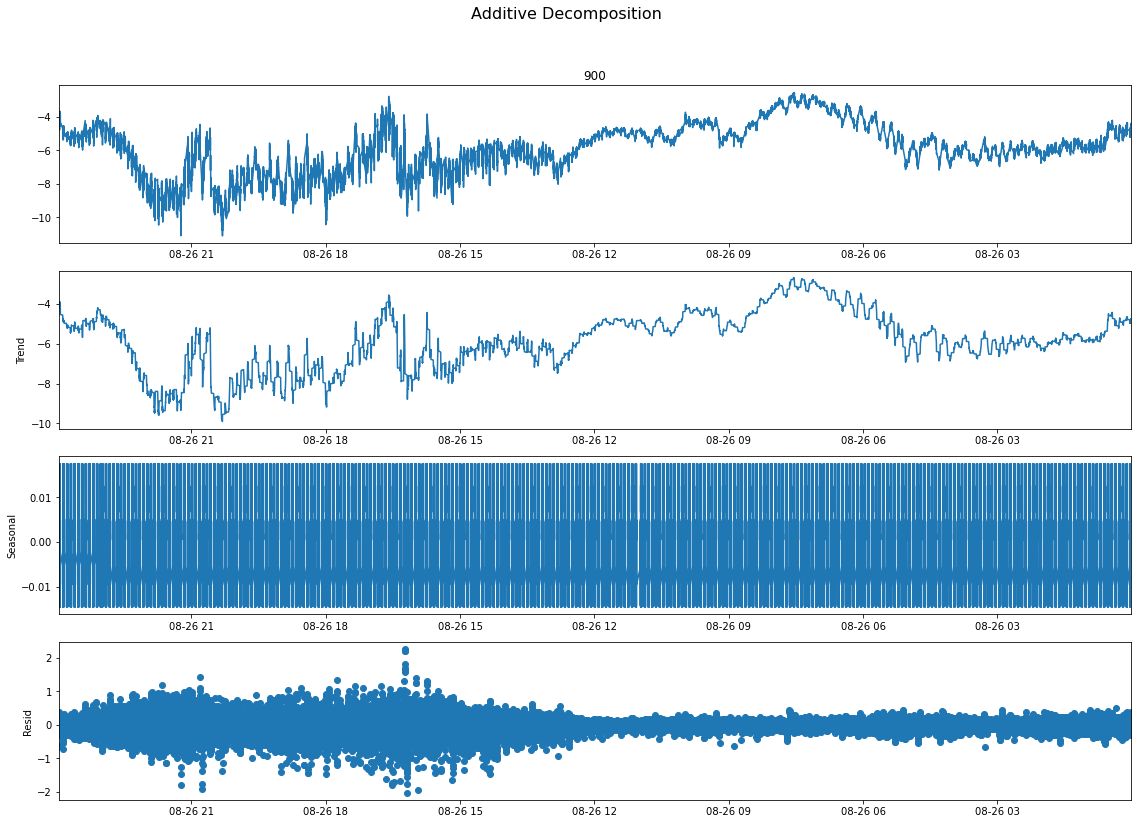

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition 
#multiplicative_decomposition = seasonal_decompose(df_cnr[200], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df_cnr[900], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
#multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
#plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


/Users/jenifervivar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jenifervivar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/jenifervivar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or m

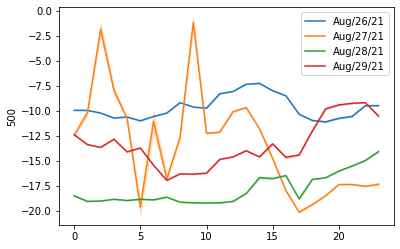

In [19]:
sns.lineplot(df_cnr.index.hour, df_cnr[500], label = "Aug/26/21")
sns.lineplot(df_cnr1.index.hour, df_cnr1[500], label = "Aug/27/21")
sns.lineplot(df_cnr2.index.hour, df_cnr2[500], label = "Aug/28/21")
sns.lineplot(df_cnr3.index.hour, df_cnr3[500], label = "Aug/29/21")
plt.legend()

<AxesSubplot:>

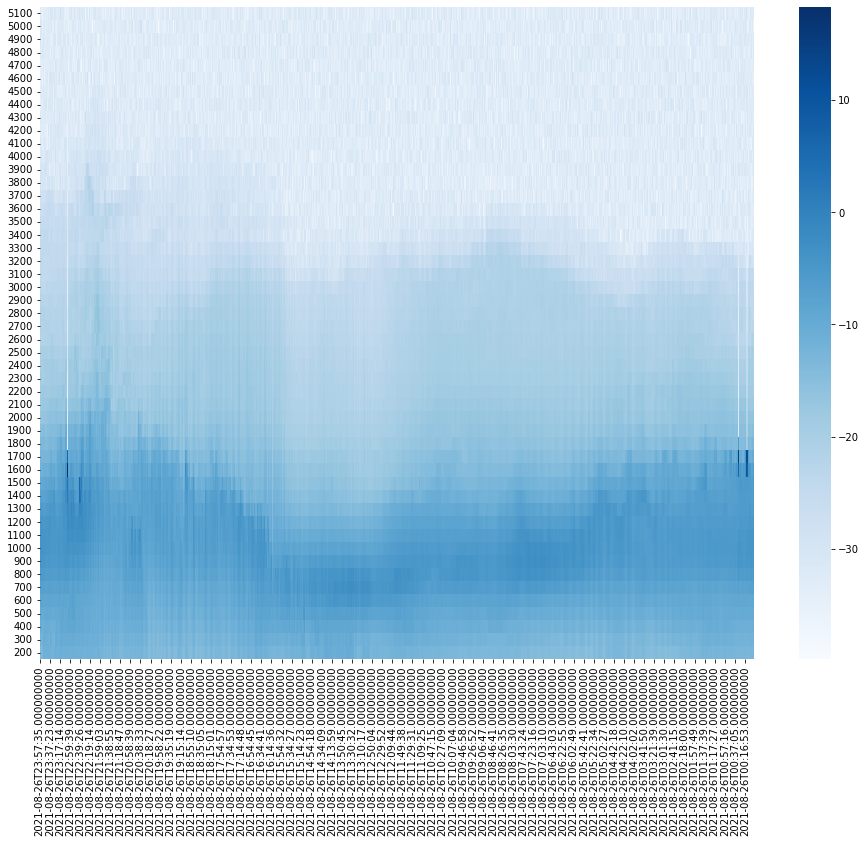

In [6]:
sns.heatmap(df_cnr.transpose(), cmap = "Blues", label = "Carrier to Noise Ratio (dB)")

In [13]:
path_day = "/Users/jenifervivar/Desktop/Desktop - jenifer’s MacBook Air/Fall 2021 NOAA Project/Lidar_Data/Vertical_data/FXD20210802/"
cnr_day = np.array([])
time_day = np.array([])
for file in sorted(os.listdir(path_day)):
    #skips dummy files
    if file != '.DS_Store':
        data = nc.Dataset(path_day + file , mode ='r')#this will open the netCDF data
        sweep_file = data[list(data.groups.keys())[1]]
        dumm_cnr = sweep_file.variables['cnr'][:]
        dumm_time= sweep_file.variables['time'][:]
        #print(dumm_cnr)
        #break
        cnr_day = np.append(cnr_day, dumm_cnr)
        time_day =np.append(time_day,dumm_time)
        
#cnr_day = np.array(cnr_day)
#time_day = np.array(time_day)
print(len(cnr_day), len(time_day))
time =(pd.to_datetime(time_day, unit = 's'))
#time_day = pd.to_datetime(time_day, unit = 's') #68687 unit = 's'
#time1 = np.flip(time_day)
columns = (np.array([i for i in range(200, 5200, 100)]))
#columns_km = np.flip(columns)/1000
df_cnr1 = pd.DataFrame(np.flip((cnr_day)).reshape(int(len(cnr_day)/50),50), columns = np.flip(columns), index = np.flip(time.round('S')))

#df_cnr.head()
#sns.heatmap(df_cnr1.transpose(), cmap = "Blues", label = "Carrier to Noise Ratio (dB)")

1734000 34680


1734000 34680


<AxesSubplot:>

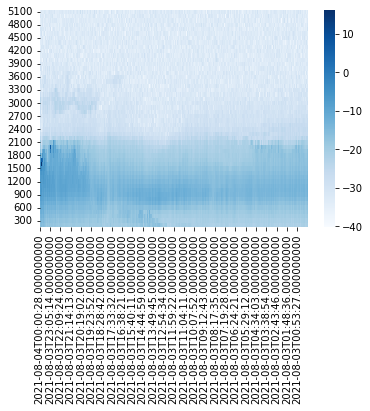

In [14]:
path_day = "/Users/jenifervivar/Desktop/Desktop - jenifer’s MacBook Air/Fall 2021 NOAA Project/Lidar_Data/Vertical_data/FXD20210803/"
cnr_day = np.array([])
time_day = np.array([])
for file in sorted(os.listdir(path_day)):
    #skips dummy files
    if file != '.DS_Store':
        data = nc.Dataset(path_day + file , mode ='r')#this will open the netCDF data
        sweep_file = data[list(data.groups.keys())[1]]
        dumm_cnr = sweep_file.variables['cnr'][:]
        dumm_time= sweep_file.variables['time'][:]
        #print(dumm_cnr)
        #break
        cnr_day = np.append(cnr_day, dumm_cnr)
        time_day =np.append(time_day,dumm_time)
        
#cnr_day = np.array(cnr_day)
#time_day = np.array(time_day)
print(len(cnr_day), len(time_day))
time =(pd.to_datetime(time_day, unit = 's'))
#time_day = pd.to_datetime(time_day, unit = 's') #68687 unit = 's'
#time1 = np.flip(time_day)
columns = (np.array([i for i in range(200, 5200, 100)]))
#columns_km = np.flip(columns)/1000
df_cnr2 = pd.DataFrame(np.flip((cnr_day)).reshape(int(len(cnr_day)/50),50), columns = np.flip(columns), index = np.flip(time.round('S')))

#df_cnr.head()
sns.heatmap(df_cnr2.transpose(), cmap = "Blues", label = "Carrier to Noise Ratio (dB)")

1734000 34680


<AxesSubplot:>

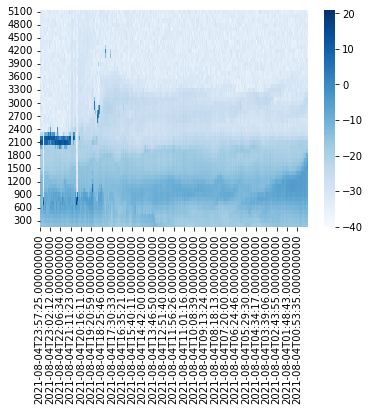

In [15]:
path_day = "/Users/jenifervivar/Desktop/Desktop - jenifer’s MacBook Air/Fall 2021 NOAA Project/Lidar_Data/Vertical_data/FXD20210804/"
time_day = np.array([])
cnr_day = np.array([])
for file in sorted(os.listdir(path_day)):
    #skips dummy files
    if file != '.DS_Store':
        data = nc.Dataset(path_day + file , mode ='r')#this will open the netCDF data
        sweep_file = data[list(data.groups.keys())[1]]
        dumm_cnr = sweep_file.variables['cnr'][:]
        dumm_time= sweep_file.variables['time'][:]
        #print(dumm_cnr)
        #break
        cnr_day = np.append(cnr_day, dumm_cnr)
        time_day =np.append(time_day,dumm_time)
        
#cnr_day = np.array(cnr_day)
#time_day = np.array(time_day)
print(len(cnr_day), len(time_day))
time =(pd.to_datetime(time_day, unit = 's'))
#time_day = pd.to_datetime(time_day, unit = 's') #68687 unit = 's'
#time1 = np.flip(time_day)
columns = (np.array([i for i in range(200, 5200, 100)]))
#columns_km = np.flip(columns)/1000
df_cnr3 = pd.DataFrame(np.flip((cnr_day)).reshape(int(len(cnr_day)/50),50), columns = np.flip(columns), index = np.flip(time.round("S")))

#df_cnr.head()
sns.heatmap(df_cnr3.transpose(), cmap = "Blues", label = "Carrier to Noise Ratio (dB)")

1731250 34625


<AxesSubplot:>

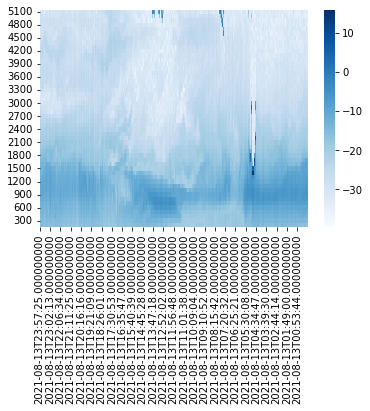

In [16]:
path_day = "/Users/jenifervivar/Desktop/Desktop - jenifer’s MacBook Air/Fall 2021 NOAA Project/Lidar_Data/Vertical_data/FXD20210813/"
time_day = np.array([])
cnr_day = np.array([])
for file in sorted(os.listdir(path_day)):
    #skips dummy files
    if file != '.DS_Store':
        data = nc.Dataset(path_day + file , mode ='r')#this will open the netCDF data
        sweep_file = data[list(data.groups.keys())[1]]
        dumm_cnr = sweep_file.variables['cnr'][:]
        dumm_time= sweep_file.variables['time'][:]
        #print(dumm_cnr)
        #break
        cnr_day = np.append(cnr_day, dumm_cnr)
        time_day =np.append(time_day,dumm_time)
        
#cnr_day = np.array(cnr_day)
#time_day = np.array(time_day)
print(len(cnr_day), len(time_day))
time =(pd.to_datetime(time_day, unit = 's'))
#time_day = pd.to_datetime(time_day, unit = 's') #68687 unit = 's'
#time1 = np.flip(time_day)
columns = (np.array([i for i in range(200, 5200, 100)]))
#columns_km = np.flip(columns)/1000
df_cnr4 = pd.DataFrame(np.flip((cnr_day)).reshape(int(len(cnr_day)/50),50), columns = np.flip(columns), index = np.flip(time.round("S")))

#df_cnr.head()
sns.heatmap(df_cnr4.transpose(), cmap = "Blues", label = "Carrier to Noise Ratio (dB)")

1725850 34517


<AxesSubplot:>

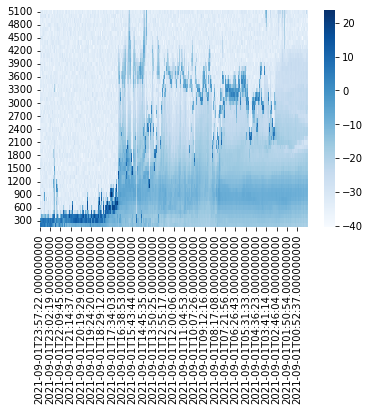

In [17]:
path_day = "/Users/jenifervivar/Desktop/Desktop - jenifer’s MacBook Air/Fall 2021 NOAA Project/Lidar_Data/Vertical_data/FXD20210901/"
time_day = np.array([])
cnr_day = np.array([])
for file in sorted(os.listdir(path_day)):
    #skips dummy files
    if file != '.DS_Store':
        data = nc.Dataset(path_day + file , mode ='r')#this will open the netCDF data
        sweep_file = data[list(data.groups.keys())[1]]
        dumm_cnr = sweep_file.variables['cnr'][:]
        dumm_time= sweep_file.variables['time'][:]
        #print(dumm_cnr)
        #break
        cnr_day = np.append(cnr_day, dumm_cnr)
        time_day =np.append(time_day,dumm_time)
        
#cnr_day = np.array(cnr_day)
#time_day = np.array(time_day)
print(len(cnr_day), len(time_day))
time =(pd.to_datetime(time_day, unit = 's'))
#time_day = pd.to_datetime(time_day, unit = 's') #68687 unit = 's'
#time1 = np.flip(time_day)
columns = (np.array([i for i in range(200, 5200, 100)]))
#columns_km = np.flip(columns)/1000
df_cnr5 = pd.DataFrame(np.flip((cnr_day)).reshape(int(len(cnr_day)/50),50), columns = np.flip(columns), index = np.flip(time.round("S")))

#df_cnr.head()
sns.heatmap(df_cnr5.transpose(), cmap = "Blues", label = "Carrier to Noise Ratio (dB)")